<a href="https://colab.research.google.com/github/Prem7539/PDS-Assignments/blob/main/stochastic_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/content/homeprices_banglore.csv")
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [4]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop("price",axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [8]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
  number_of_features = X.shape[1]

  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, X.T) + b #weight * area + bias

    w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted)) # error is multiplied with transpose of X, and then it is divided by no of samples
    b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)   # finding w gradient and b gradient

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_true-y_predicted)) # cost function

    if i%10 == 0:
      cost_list.append(cost) # after every 10th iteration, we want to record the value
      epoch_list.append(i)


  return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost


(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

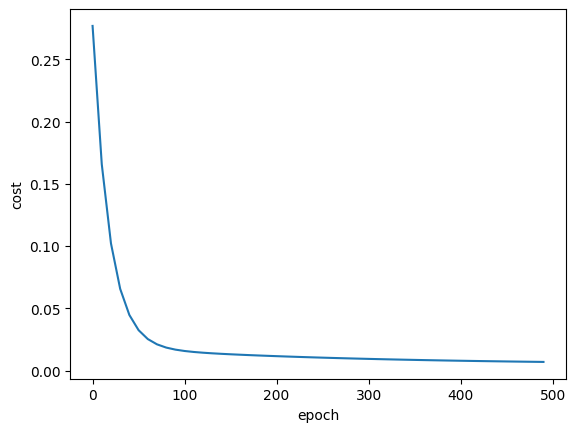

In [9]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [12]:
sy.inverse_transform([[1,0.5,0]])

array([[167. ,  99.5,  32. ]])

In [26]:
def predict(area, bedrooms,w,b):
  scaled_X = sx.transform([[area, bedrooms]])[0]
  scaled_price = w[0]*scaled_X[0] + w[1] * scaled_X[1] + b
  return sy.inverse_transform([[(scaled_price)]])
predict(2600,4,w,b)   # 2600 is area and 4 is no of bedrooms and our model will predict price of house based on  the area, it gave 1.28 Cr while the real value was 1.2 Cr

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.45484403]])

In [28]:
predict(1500,3, w,b)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[69.47860786]])

In [29]:
predict(2000,3, w,b)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[85.93754351]])

In [32]:
import random
random.randint(0,6) # it always gives a random value and has a great importance in stochastic gradient descent

2

# Stochastic Gradient Descent


In [35]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
  number_of_features = X.shape[1]
  # numpy array with 1 row and columns equal to numbger of features. In
  # our case number_of_features = 3 (area, bedroom and age)
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0, total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w, sample_x.T) + b

    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples)*(sample_y-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(sample_y-y_predicted)
    if i%100 == 0: #at every 100th iteration record the cost and epoch value
      cost_list.append(cost)
      epoch_list.append(i)

  return w, b, cost, cost_list, epoch_list

w_sgd,  b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],),5000)
w_sgd, b_sgd, cost_sgd


(array([0.75705222, 0.72841657]),
 np.float64(-0.2781144668262886),
 np.float64(0.01754918654689726))

In [40]:
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

#plot for SGD


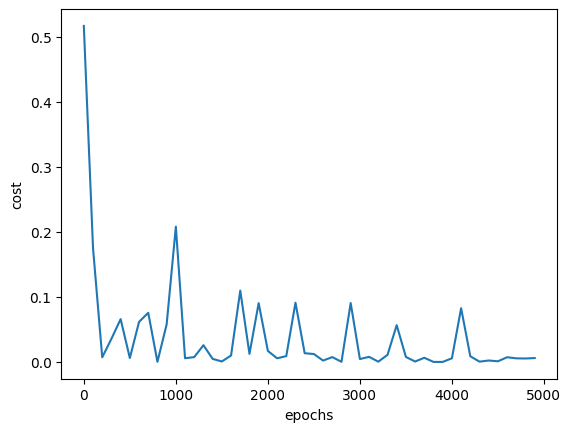

In [41]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [44]:
predict(2600,4,w_sgd,b_sgd) #predicts approximate value

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[131.64247964]])

In [45]:
predict(1500,3,w_sgd,b_sgd)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[68.29212562]])

Q) Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD. In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulative error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch we do after every m samples (where m is batch size and it is 0 < m<n, where n is total no of samples.